In [1]:
import pandas as pd  # 데이터 처리를 위한 라이브러리

# CSV 파일 불러오기
url = "https://raw.githubusercontent.com/MyungKyuYi/AI-class/refs/heads/main/wine.csv"

# 컬럼명이 없는 경우 header=None을 지정하여 컬럼명이 자동으로 들어가지 않도록 함
# df = pd.read_csv(url, header=None)
df = pd.read_csv(url)

# 데이터 확인
df

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [2]:
# 결측치 확인
df.isnull().sum()

Wine                    0
Alcohol                 0
Malic.acid              0
Ash                     0
Acl                     0
Mg                      0
Phenols                 0
Flavanoids              0
Nonflavanoid.phenols    0
Proanth                 0
Color.int               0
Hue                     0
OD                      0
Proline                 0
dtype: int64

In [3]:
# 'Wine' 컬럼의 각 값이 몇 개씩 존재하는지 확인
df['Wine'].value_counts()

Wine
2    71
1    59
3    48
Name: count, dtype: int64

In [4]:
# 'Wine' 컬럼을 타겟(y)으로 설정하고, 나머지 컬럼을 입력(X)으로 설정
X = df.drop('Wine', axis=1).values # 'Wine' 컬럼 제거 → X (입력 데이터)
y = df['Wine'].values # 'output' 컬럼만 추출 → y (정답 데이터)

In [5]:
X

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [6]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3], dtype=int64)

In [7]:
from sklearn.model_selection import train_test_split  # 데이터 분할 라이브러리

# 80% 훈련 데이터, 20% 테스트 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 크기 확인
print("\n 데이터 크기 확인:")
print("X_train:", X_train.shape, "X_test:", X_test.shape, "y_train:", y_train.shape, "y_test:", y_test.shape)


 데이터 크기 확인:
X_train: (142, 13) X_test: (36, 13) y_train: (142,) y_test: (36,)


In [8]:
import matplotlib.pyplot as plt  # 데이터 시각화를 위한 라이브러리

In [9]:
from sklearn.linear_model import LinearRegression  # 선형 회귀 모델
from sklearn.metrics import mean_squared_error  # RMSE 평가 지표

model = LinearRegression()
model.fit(X_train, y_train)
y_preds = model.predict(X_test)

# 평균제곱근오차 (RMSE)
print("\n Linear Regression 평균제곱근오차:", mean_squared_error(y_test, y_preds, squared=False))


 Linear Regression 평균제곱근오차: 0.2617890078719134


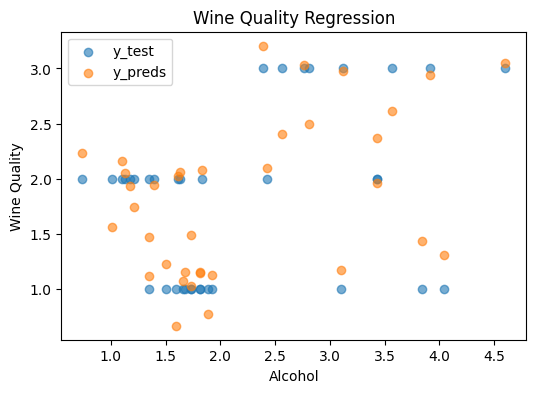

In [17]:
# 🔹 선형 회귀 산점도 시각화
plt.figure(figsize=(6, 4))
plt.scatter(X_test[:, df.columns.get_loc('Alcohol')], y_test, label='y_test', alpha=0.6)
plt.scatter(X_test[:, df.columns.get_loc('Alcohol')], y_preds, label='y_preds', alpha=0.6)
plt.title("Linear Regression")
plt.xlabel("Alcohol")
plt.ylabel("Wine Quality")
plt.legend()
plt.show()

In [18]:
from sklearn.tree import DecisionTreeRegressor  # 결정 트리 모델

model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)
y_preds = model.predict(X_test)

print("\n Decision Tree 평균제곱근오차:", mean_squared_error(y_test, y_preds, squared=False))


 Decision Tree 평균제곱근오차: 0.408248290463863


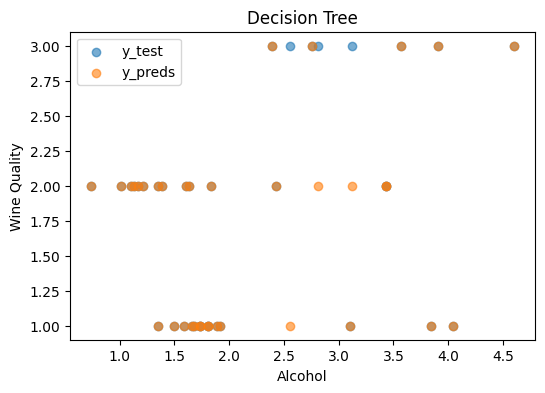

In [20]:
# 🔹 결정 트리 산점도 시각화
plt.figure(figsize=(6, 4))
plt.scatter(X_test[:, df.columns.get_loc('Alcohol')], y_test, label='y_test', alpha=0.6)
plt.scatter(X_test[:, df.columns.get_loc('Alcohol')], y_preds, label='y_preds', alpha=0.6)
plt.title("Decision Tree")
plt.xlabel("Alcohol")
plt.ylabel("Wine Quality")
plt.legend()
plt.show()

In [21]:
from sklearn.ensemble import RandomForestRegressor  # 랜덤 포레스트 모델

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)
y_preds = model.predict(X_test)

print("\n Random Forest 평균제곱근오차:", mean_squared_error(y_test, y_preds, squared=False))


 Random Forest 평균제곱근오차: 0.25219040425836986


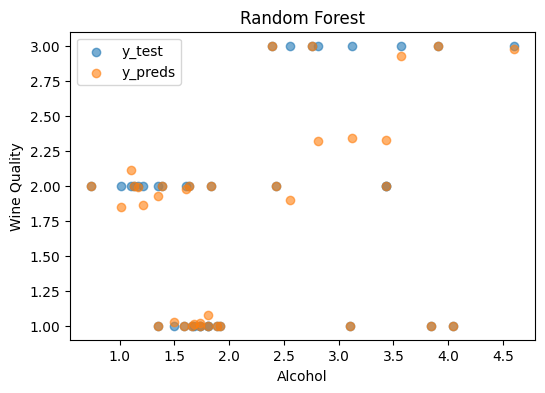

In [22]:
# 🔹 랜덤 포레스트 산점도 시각화
plt.figure(figsize=(6, 4))
plt.scatter(X_test[:, df.columns.get_loc('Alcohol')], y_test, label='y_test', alpha=0.6)
plt.scatter(X_test[:, df.columns.get_loc('Alcohol')], y_preds, label='y_preds', alpha=0.6)
plt.title("Random Forest")
plt.xlabel("Alcohol")
plt.ylabel("Wine Quality")
plt.legend()
plt.show()

In [23]:
from sklearn.svm import SVR  # 서포트 벡터 회귀 모델

model = SVR(kernel='linear')
model.fit(X_train, y_train)
y_preds = model.predict(X_test)

print("\n SVR 평균제곱근오차:", mean_squared_error(y_test, y_preds, squared=False))


 SVR 평균제곱근오차: 0.2673486334798186


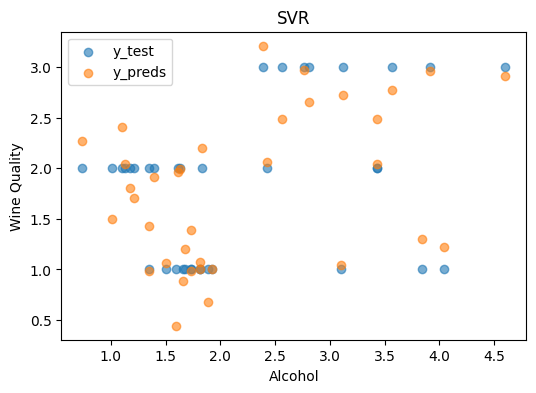

In [24]:
# 🔹 SVR 산점도 시각화
plt.figure(figsize=(6, 4))
plt.scatter(X_test[:, df.columns.get_loc('Alcohol')], y_test, label='y_test', alpha=0.6)
plt.scatter(X_test[:, df.columns.get_loc('Alcohol')], y_preds, label='y_preds', alpha=0.6)
plt.title("SVR")
plt.xlabel("Alcohol")
plt.ylabel("Wine Quality")
plt.legend()
plt.show()

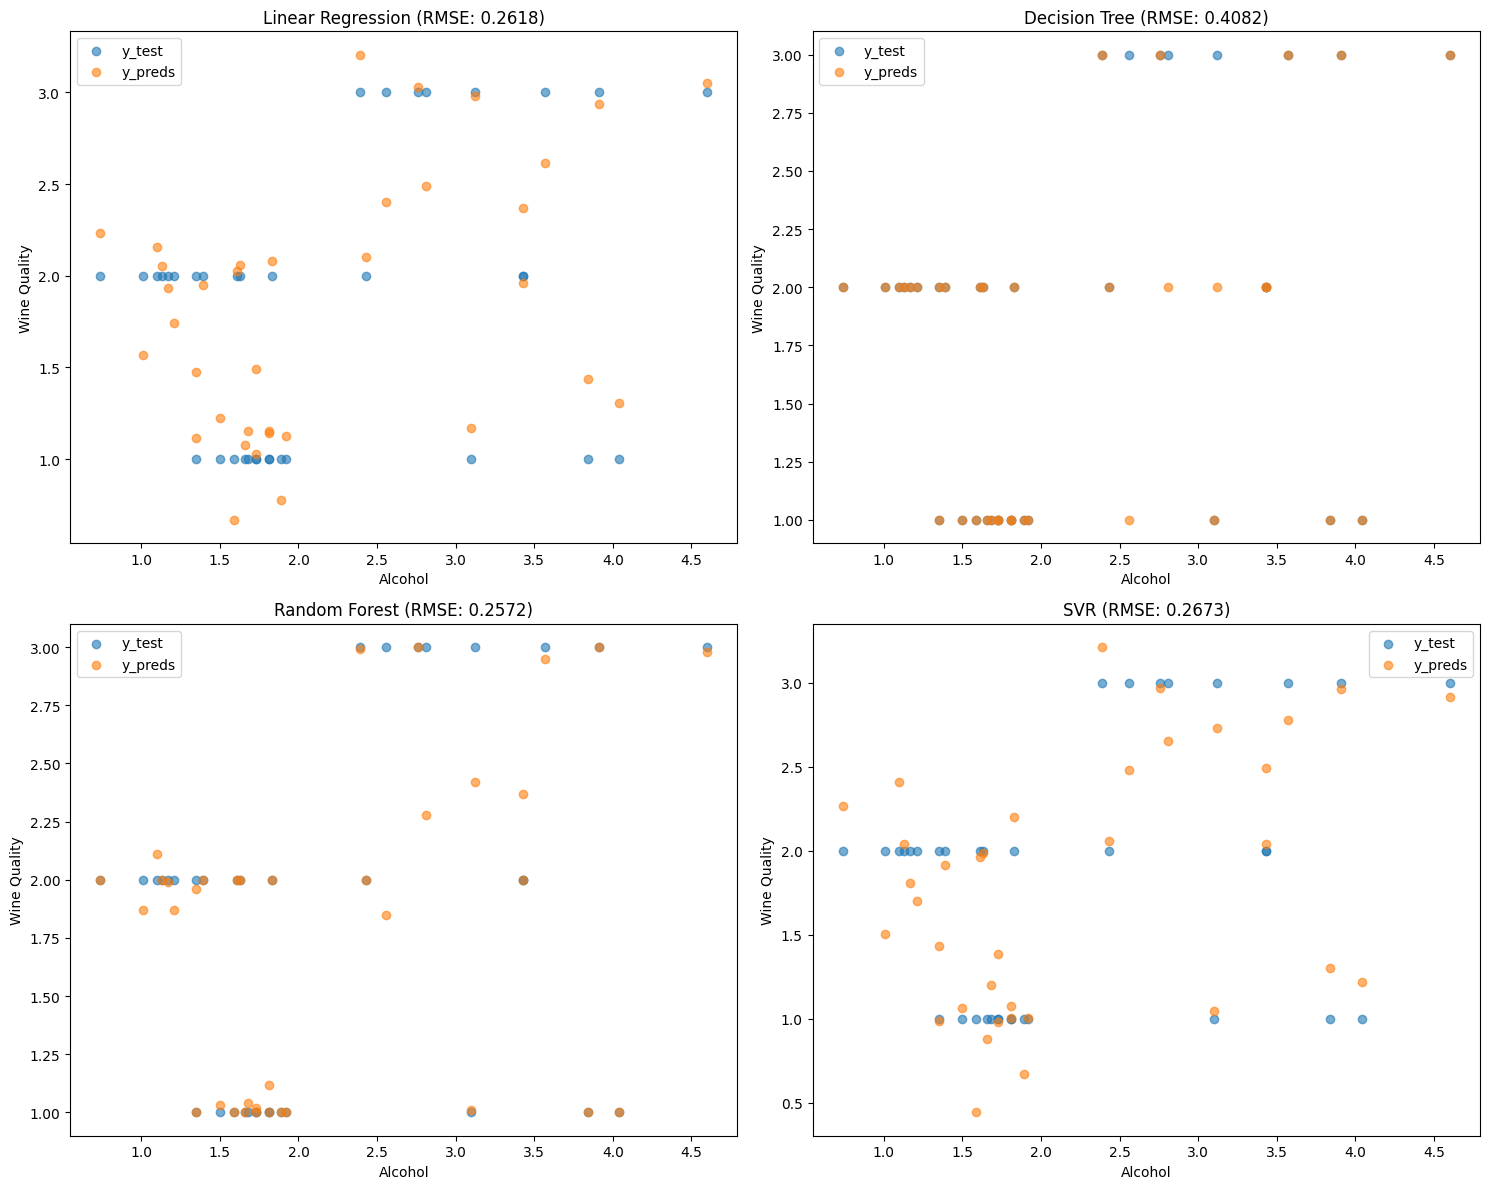

In [25]:
import matplotlib.pyplot as plt  # 데이터 시각화를 위한 라이브러리

# 회귀 모델 리스트
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "SVR": SVR(kernel='linear')
}

# 모델 학습 및 예측
results = {}
plt.figure(figsize=(15, 12))

for i, (name, model) in enumerate(models.items()):
    model.fit(X_train, y_train)  # 모델 학습
    y_preds = model.predict(X_test)  # 예측값
    rmse = mean_squared_error(y_test, y_preds, squared=False)  # RMSE 계산
    results[name] = rmse  # RMSE 저장

    # 산점도 시각화
    plt.subplot(2, 2, i + 1)
    plt.scatter(X_test[:, df.columns.get_loc('Alcohol')], y_test, label='y_test', alpha=0.6)
    plt.scatter(X_test[:, df.columns.get_loc('Alcohol')], y_preds, label='y_preds', alpha=0.6)
    plt.title(f"{name} (RMSE: {rmse:.4f})")
    plt.xlabel("Alcohol")
    plt.ylabel("Wine Quality")
    plt.legend()

plt.tight_layout()
plt.show()

In [26]:
# RMSE 출력
print("\n 모델별 RMSE 비교")
for name, rmse in results.items():
    print(f"{name} 평균제곱근오차:", rmse)


 모델별 RMSE 비교
Linear Regression 평균제곱근오차: 0.2617890078719134
Decision Tree 평균제곱근오차: 0.408248290463863
Random Forest 평균제곱근오차: 0.2572396202419492
SVR 평균제곱근오차: 0.2673486334798186
